In [39]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BDay

In [40]:
df = pd.read_excel("ativos_bloomberg.xlsx")
df.head()

,Data,ODF27 Comdty,ODF30 Comdty,BNTNB 6 05/15/2029 Govt,BNTNB 6 08/15/2050 Govt,USGG10YR Index,CNH Curncy,USDBRL Curncy,EUR Curncy,SPX Index,IBOV Index
0,2023-01-02,12.918,12.933,NaN,3947.108,3.8748,6.9270,5.3597,1.0667,3839.50,106376.02
1,2023-01-03,13.155,13.134,NaN,3947.108,3.7389,6.9237,5.4627,1.0548,3824.14,104165.74
2,2023-01-04,13.318,13.287,NaN,3877.922,3.6827,6.8995,5.4316,1.0604,3852.97,105334.46
3,2023-01-05,13.055,13.025,NaN,3877.922,3.7181,6.8884,5.3529,1.0522,3808.10,107641.32
4,2023-01-06,12.815,12.832,NaN,3877.922,3.5580,6.8303,5.2250,1.0644,3895.08,108963.70


In [41]:
rename_dict = {
    "ODF27 Comdty": "DI1F27",
    "ODF30 Comdty": "DI1F30",
    "BNTNB 6 05/15/2029 Govt": "NTNB-2029P",
    "BNTNB 6 08/15/2050 Govt": "NTNB-2050P",
    "USGG10YR Index": "T10",
    "CNH Curncy": "CNY",
    "USDBRL Curncy": "DOL",
    "EUR Curncy": "EUR",
    "SPX Index": "S&P500",
    "IBOV Index": "IBOV",
}

In [42]:
df.rename(columns=rename_dict, inplace=True)


In [43]:
df

,Data,DI1F27,DI1F30,NTNB-2029P,NTNB-2050P,T10,CNY,DOL,EUR,S&P500,IBOV
0,2023-01-02,12.918,12.933,NaN,3947.108000,3.8748,6.9270,5.3597,1.0667,3839.50,106376.02
1,2023-01-03,13.155,13.134,NaN,3947.108000,3.7389,6.9237,5.4627,1.0548,3824.14,104165.74
2,2023-01-04,13.318,13.287,NaN,3877.922000,3.6827,6.8995,5.4316,1.0604,3852.97,105334.46
3,2023-01-05,13.055,13.025,NaN,3877.922000,3.7181,6.8884,5.3529,1.0522,3808.10,107641.32
4,2023-01-06,12.815,12.832,NaN,3877.922000,3.5580,6.8303,5.2250,1.0644,3895.08,108963.70
...,...,...,...,...,...,...,...,...,...,...,...
672,2025-07-30,14.227,13.537,4326.265000,4065.741000,4.3700,7.2113,5.5714,1.1405,6362.90,133989.74
673,2025-07-31,14.350,13.668,4317.036000,4062.940000,4.3740,7.2091,5.6003,1.1415,6339.39,133071.05
674,2025-08-01,14.196,13.552,4329.141000,4083.045000,4.2159,7.1938,5.5421,1.1587,6238.01,132437.39
675,2025-08-04,14.158,13.463,4336.519000,4091.740000,4.1923,7.1841,5.4990,1.1571,6329.94,132971.20


| Coluna | Código destino | Observação |
| :--- | :--- | :--- |
| ODF27 Comdty | DI1F27 | Taxa dos contratos DI futuros. Se quiser preço, precisa converter. |
| ODF30 Comdty | DI1F30 | Taxa dos contratos DI futuros. |
| USGG10YR Index | T10 | Treasury 10 anos. É uma taxa (yield). Requer conversão se quiser o preço. |

$$ Preco = \frac{1000}{(1+r)^{\frac{d}{252}}} $$

In [44]:
df['Data'] = pd.to_datetime(df['Data'])

In [45]:
vencimento_DI1F27 = pd.to_datetime("2027-01-01")
vencimento_DI1F30 = pd.to_datetime("2030-01-01")

In [46]:
# Calcular dias úteis até vencimento
df['dias_uteis_DI1F27'] = [(len(pd.bdate_range(start=dt, end=vencimento_DI1F27)) - 1) for dt in df['Data']]
df['dias_uteis_DI1F30'] = [(len(pd.bdate_range(start=dt, end=vencimento_DI1F30)) - 1) for dt in df['Data']]
df['dias_uteis_T10'] = 252 * 10  # constante: 2520 dias úteis

In [47]:
# Recalcular preço com fórmula: 1000 / (1 + r)^(dias_uteis / 252)
df['DI1F27_preco'] = 1000 / np.power(1 + df['DI1F27']/100, df['dias_uteis_DI1F27'] / 252)
df['DI1F30_preco'] = 1000 / np.power(1 + df['DI1F30']/100, df['dias_uteis_DI1F30'] / 252)
df['T10_preco']     = 1000 / np.power(1 + df['T10']/100, df['dias_uteis_T10'] / 252)

In [48]:
df

,Data,DI1F27,DI1F30,NTNB-2029P,NTNB-2050P,T10,CNY,DOL,EUR,S&P500,IBOV,dias_uteis_DI1F27,dias_uteis_DI1F30,dias_uteis_T10,DI1F27_preco,DI1F30_preco,T10_preco
0,2023-01-02,12.918,12.933,NaN,3947.108000,3.8748,6.9270,5.3597,1.0667,3839.50,106376.02,1044,1826,2520,604.518636,414.246011,683.751031
1,2023-01-03,13.155,13.134,NaN,3947.108000,3.7389,6.9237,5.4627,1.0548,3824.14,104165.74,1043,1825,2520,599.584389,409.142938,692.761292
2,2023-01-04,13.318,13.287,NaN,3877.922000,3.6827,6.8995,5.4316,1.0604,3852.97,105334.46,1042,1824,2520,596.318598,405.358653,696.525497
3,2023-01-05,13.055,13.025,NaN,3877.922000,3.7181,6.8884,5.3529,1.0522,3808.10,107641.32,1041,1823,2520,602.368815,412.409633,694.151835
4,2023-01-06,12.815,12.832,NaN,3877.922000,3.5580,6.8303,5.2250,1.0644,3895.08,108963.70,1040,1822,2520,607.970981,417.740178,704.958345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,2025-07-30,14.227,13.537,4326.265000,4065.741000,4.3700,7.2113,5.5714,1.1405,6362.90,133989.74,372,1154,2520,821.717035,559.120800,651.993349
673,2025-07-31,14.350,13.668,4317.036000,4062.940000,4.3740,7.2091,5.6003,1.1415,6339.39,133071.05,371,1153,2520,820.849273,556.458872,651.743524
674,2025-08-01,14.196,13.552,4329.141000,4083.045000,4.2159,7.1938,5.5421,1.1587,6238.01,132437.39,370,1152,2520,822.912860,559.346558,661.698524
675,2025-08-04,14.158,13.463,4336.519000,4091.740000,4.1923,7.1841,5.4990,1.1571,6329.94,132971.20,369,1151,2520,823.747806,561.636512,663.198828


In [49]:
nan_count = df['NTNB-2029P'].isna().sum()
print(f"Quantidade de NaN na coluna NTNB-2029P: {nan_count}")

Quantidade de NaN na coluna NTNB-2029P: 276


In [50]:
df = df.iloc[276:].reset_index(drop=True) #276 temos NTNB-2029P com NaN
df.head()

,Data,DI1F27,DI1F30,NTNB-2029P,NTNB-2050P,T10,CNY,DOL,EUR,S&P500,IBOV,dias_uteis_DI1F27,dias_uteis_DI1F30,dias_uteis_T10,DI1F27_preco,DI1F30_preco,T10_preco
0,2024-01-23,9.951,10.518,4341.021,4491.526,4.1282,7.1674,4.9503,1.0854,4864.60,128262.52,768,1550,2520,748.928889,540.570665,667.292724
1,2024-01-24,9.931,10.500,4341.021,4499.201,4.1762,7.1623,4.9328,1.0885,4868.55,127815.70,767,1549,2520,749.625818,541.326949,664.224487
2,2024-01-25,9.833,10.429,4352.082,4506.861,4.1184,7.1799,4.9166,1.0846,4894.16,128168.73,766,1548,2520,751.943274,543.683846,667.921070
3,2024-01-26,9.786,10.387,4352.082,4520.395,4.1373,7.1885,4.9109,1.0853,4890.97,128967.32,765,1547,2520,753.201208,545.169552,666.709842
4,2024-01-29,9.839,10.453,4352.082,4512.293,4.0740,7.1875,4.9480,1.0833,4927.93,128502.66,764,1546,2520,752.378592,543.387151,670.776028


In [51]:
nova_ordem = [
    'Data',
    'NTNB-2029P',
    'NTNB-2050P',
    'DI1F27_preco',
    'DI1F30_preco',
    'T10_preco',
    'CNY',
    'DOL',
    'EUR',
    'S&P500',
    'IBOV'
]

# Garantir que todas as colunas existam no DataFrame antes de reordenar
colunas_disponiveis = [col for col in nova_ordem if col in df.columns]
df_reordenado = df[colunas_disponiveis]

In [52]:
df = df_reordenado.copy()

In [53]:
df.to_excel("ativos_tratados.xlsx", index=False)

### Modelo de Markowitz

In [54]:
df.head()

,Data,NTNB-2029P,NTNB-2050P,DI1F27_preco,DI1F30_preco,T10_preco,CNY,DOL,EUR,S&P500,IBOV
0,2024-01-23,4341.021,4491.526,748.928889,540.570665,667.292724,7.1674,4.9503,1.0854,4864.60,128262.52
1,2024-01-24,4341.021,4499.201,749.625818,541.326949,664.224487,7.1623,4.9328,1.0885,4868.55,127815.70
2,2024-01-25,4352.082,4506.861,751.943274,543.683846,667.921070,7.1799,4.9166,1.0846,4894.16,128168.73
3,2024-01-26,4352.082,4520.395,753.201208,545.169552,666.709842,7.1885,4.9109,1.0853,4890.97,128967.32
4,2024-01-29,4352.082,4512.293,752.378592,543.387151,670.776028,7.1875,4.9480,1.0833,4927.93,128502.66


In [55]:
df_prices = df.set_index('Data').copy()
log_returns = np.log(df_prices / df_prices.shift(1))

In [56]:
import plotly.graph_objects as go

fig = go.Figure()

for col in log_returns.columns:
    fig.add_trace(go.Scatter(x=log_returns.index, y=log_returns[col], mode='lines', name=col))

fig.update_layout(
    title="Retornos Logarítmicos dos Ativos",
    xaxis_title="Data",
    yaxis_title="Log Retorno Diário",
    template="plotly_white",
    height=600,
    hovermode="x unified"
)

fig.show()


In [57]:
mu = log_returns.mean() * 252  # Anualiza a média dos retornos logarítmicos diários
S = log_returns.cov() * 252
correlation_matrix = log_returns.corr()

In [58]:
mu_df = mu.to_frame(name="Retorno Anual")
print(mu_df)

              Retorno Anual
NTNB-2029P        -0.000213
NTNB-2050P        -0.060237
DI1F27_preco       0.060263
DI1F30_preco       0.023083
T10_preco         -0.004355
CNY                0.001896
DOL                0.067026
EUR                0.040572
S&P500             0.164718
IBOV               0.025178


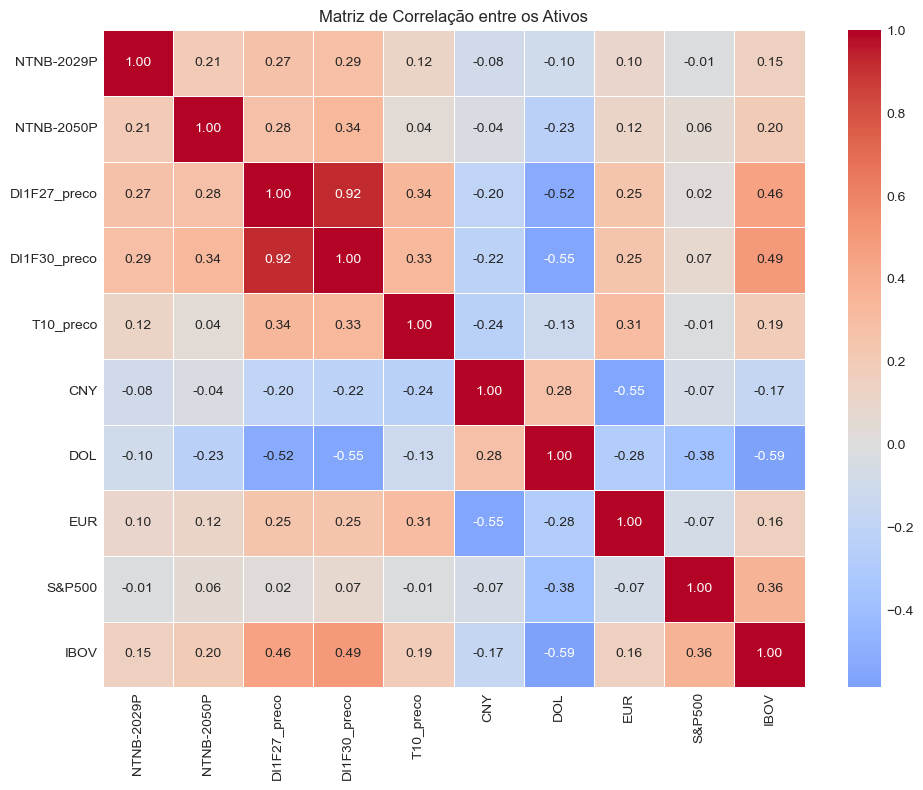

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, center=0)
plt.title("Matriz de Correlação entre os Ativos")
plt.tight_layout()
plt.show()

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [61]:
grupos = {
    'NTNB-2029P'  : 'IPCA + Pré',
    'NTNB-2050P'  : 'IPCA + Pré',
    'DI1F27_preco': 'IPCA + Pré',
    'DI1F30_preco': 'IPCA + Pré',
    'T10_preco'   : 'Treasury',
    'CNY'         : 'Yuan',
    'DOL'         : 'US$',
    'EUR'         : 'Euro',
    'S&P500'      : 'S&P',
    'IBOV'        : 'IBOVESPA'
}

limites = {         # valores já em fração (ex.: 0.3 = 30 %)
    'IPCA + Pré': 2.0,
    'US$'       : 0.3,
    'Treasury'  : 1.0,
    'S&P'       : 0.2,
    'Ações BDR' : 0.2,
    'IBOVESPA'  : 0.25,
    'Euro'      : 0.3,
    'Yuan'      : 0.3
}

ativos = mu.index.tolist()                       # ordem = df_prices cols

# Bounds individuais por ativo
bounds = [(0, limites[grupos[a]]) for a in ativos]

# Constraint: soma dos pesos = 1
COMMON_CONSTRAINTS = [{'type': 'eq',
                       'fun' : lambda x: np.sum(x) - 1}]

# Constraint: soma dos pesos de cada grupo ≤ limite_grupo
for grupo, limite in limites.items():
    idx = [i for i, a in enumerate(ativos) if grupos[a] == grupo]
    if idx:                                       # só se houver ativos
        COMMON_CONSTRAINTS.append({
            'type': 'ineq',
            'fun' : lambda x, idx=idx, lim=limite: lim - np.sum(x[idx])
        })

In [62]:
def portfolio_annualised_performance(w, mean, cov):
    """
    Retorna (volatilidade, retorno) anualizados.
    """
    ret = np.dot(w, mean)
    vol = np.sqrt(np.dot(w.T, np.dot(cov, w)))
    return vol, ret

def neg_sharpe_ratio(w, mean, cov, rf):
    vol, ret = portfolio_annualised_performance(w, mean, cov)
    return -(ret - rf) / vol                      # sinal invertido

def max_sharpe_ratio(mean, cov, rf):
    n   = len(mean)
    res = minimize(neg_sharpe_ratio, n*[1/n], args=(mean, cov, rf),
                   method='SLSQP', bounds=bounds, constraints=COMMON_CONSTRAINTS)
    return res

def portfolio_volatility(w, mean, cov):
    return portfolio_annualised_performance(w, mean, cov)[0]

def min_variance(mean, cov):
    n   = len(mean)
    res = minimize(portfolio_volatility, n*[1/n], args=(mean, cov),
                   method='SLSQP', bounds=bounds, constraints=COMMON_CONSTRAINTS)
    return res

def efficient_return(mean, cov, target):
    n = len(mean)
    def port_ret(w):  # retorno da carteira
        return np.dot(w, mean)
    cons = COMMON_CONSTRAINTS + [{'type': 'eq',
                                  'fun' : lambda x, t=target: port_ret(x) - t}]
    res = minimize(portfolio_volatility, n*[1/n], args=(mean, cov),
                   method='SLSQP', bounds=bounds, constraints=cons)
    return res

def efficient_frontier(mean, cov, targets):
    return [efficient_return(mean, cov, t) for t in targets]

In [63]:
risk_free_rate = 0.15                          # Selic

opt_sharpe = max_sharpe_ratio(mu.values, S.values, risk_free_rate)
opt_var    = min_variance   (mu.values, S.values)

vol_sharpe, ret_sharpe = portfolio_annualised_performance(opt_sharpe.x, mu.values, S.values)
vol_min,    ret_min    = portfolio_annualised_performance(opt_var.x,    mu.values, S.values)

# Fronteira eficiente (50 pontos)
targets = np.linspace(ret_min, ret_sharpe + 0.05, 50)
efficient_ports = efficient_frontier(mu.values, S.values, targets)


In [64]:
n_rand = 10_000
rand_ret, rand_vol, rand_shp = [], [], []

upper_bounds = np.array([b[1] for b in bounds])

for _ in range(n_rand):
    raw = np.random.random(len(ativos)) * upper_bounds   # respeita teto
    w   = raw / raw.sum()                                # soma = 1
    vol, ret = portfolio_annualised_performance(w, mu.values, S.values)
    rand_ret.append(ret)
    rand_vol.append(vol)
    rand_shp.append((ret - risk_free_rate) / vol)

df_rand = pd.DataFrame({'ret': rand_ret, 'vol': rand_vol, 'shp': rand_shp})

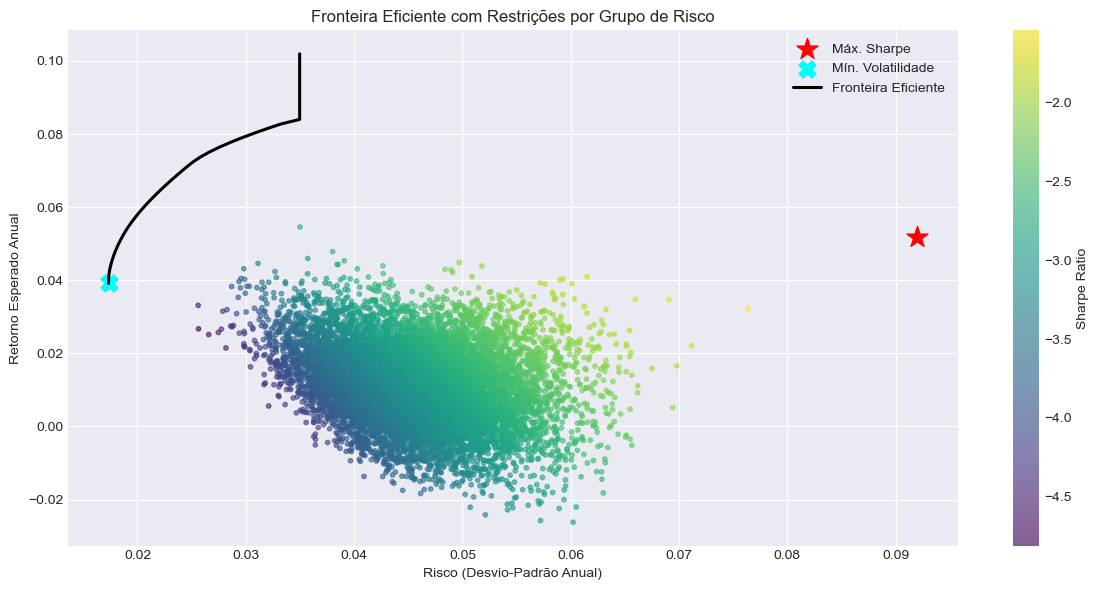

In [65]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))

sc = plt.scatter(df_rand['vol'], df_rand['ret'],
                 c=df_rand['shp'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(sc, label='Sharpe Ratio')

plt.scatter(vol_sharpe, ret_sharpe, marker='*', color='red',
            s=250, label='Máx. Sharpe')
plt.scatter(vol_min, ret_min, marker='X', color='cyan',
            s=150, label='Mín. Volatilidade')

plt.plot([p.fun for p in efficient_ports], targets,
         color='black', linewidth=2.2, label='Fronteira Eficiente')

plt.title('Fronteira Eficiente com Restrições por Grupo de Risco')
plt.xlabel('Risco (Desvio-Padrão Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
def show_alloc(tag, res):
    w = np.round(res.x * 100, 2)
    df = pd.DataFrame({'Ativo': ativos, 'Peso (%)': w})
    print(f'\n{tag}\n', df.sort_values('Peso (%)', ascending=False).reset_index(drop=True))

show_alloc('Carteira Máx. Sharpe',      opt_sharpe)
show_alloc('Carteira Mín. Volatilidade', opt_var)


Carteira Máx. Sharpe
           Ativo  Peso (%)
0  DI1F30_preco      55.0
1          IBOV      25.0
2        S&P500      20.0
3    NTNB-2029P       0.0
4    NTNB-2050P       0.0
5  DI1F27_preco       0.0
6     T10_preco       0.0
7           CNY       0.0
8           DOL       0.0
9           EUR       0.0

Carteira Mín. Volatilidade
           Ativo  Peso (%)
0           CNY     30.00
1  DI1F27_preco     29.87
2           EUR     15.68
3           DOL     10.35
4    NTNB-2029P      7.73
5        S&P500      4.65
6    NTNB-2050P      0.87
7          IBOV      0.67
8     T10_preco      0.18
9  DI1F30_preco      0.00


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Número de ativos
assets = log_returns.columns.tolist()
print(assets)
n_assets = len(assets)
print(f"Número de ativos: {n_assets}")
# Simular 10.000 carteiras
n_portfolios = 100000
results = {
    'retorno': [],
    'risco': [],
    'sharpe': [],
    'pesos': []
}

# Simulação
for _ in range(n_portfolios):
    # Gera pesos aleatórios que somam 1
    pesos = np.random.random(n_assets) # []
    pesos /= np.sum(pesos)
    #print(pesos)
    
    # Retorno e risco da carteira
    retorno = np.dot(pesos, mu) #E[R_p] = wᵀ * μ
    variancia = np.dot(pesos.T, np.dot(S, pesos))           #Var(R_p) = wᵀ * Σ * w
    risco = np.sqrt(variancia)
    sharpe = retorno / risco  # sem taxa livre de risco
    
    # Salva
    results['retorno'].append(retorno)
    results['risco'].append(risco)
    results['sharpe'].append(sharpe)
    results['pesos'].append(pesos)

# DataFrame com resultados
df_portfolios = pd.DataFrame(results)




['NTNB-2029P', 'NTNB-2050P', 'DI1F27_preco', 'DI1F30_preco', 'T10_preco', 'CNY', 'DOL', 'EUR', 'S&P500', 'IBOV']
Número de ativos: 10


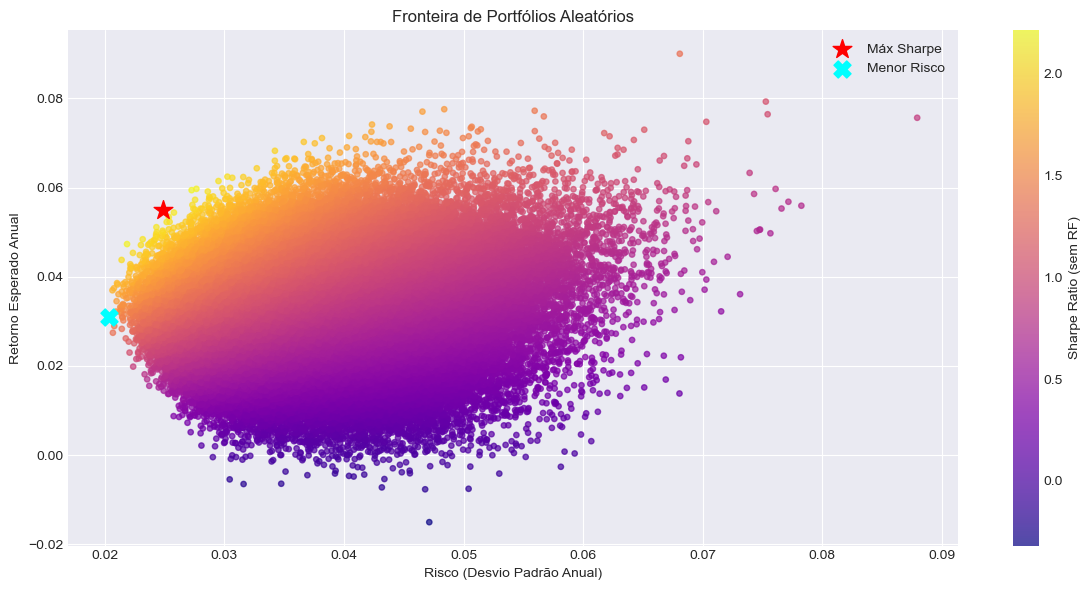

In [68]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))

# Ponto de cada carteira
scatter = plt.scatter(df_portfolios['risco'], df_portfolios['retorno'], 
                      c=df_portfolios['sharpe'], cmap='plasma', s=15, alpha=0.7)

# Cor de fundo (Sharpe Ratio)
plt.colorbar(scatter, label='Sharpe Ratio (sem RF)')

# Destacar o portfólio de maior Sharpe
idx_max = df_portfolios['sharpe'].idxmax()
max_sharpe = df_portfolios.loc[idx_max]
plt.scatter(max_sharpe['risco'], max_sharpe['retorno'], 
            color='red', marker='*', s=200, label='Máx Sharpe')

# Destacar o portfólio de menor risco
idx_min_risk = df_portfolios['risco'].idxmin()
min_risk = df_portfolios.loc[idx_min_risk]
plt.scatter(min_risk['risco'], min_risk['retorno'], 
            color='cyan', marker='X', s=150, label='Menor Risco')

# Eixos e título
plt.xlabel('Risco (Desvio Padrão Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.title('Fronteira de Portfólios Aleatórios')

# Grade, legenda e layout
plt.legend()
plt.tight_layout()
plt.show()

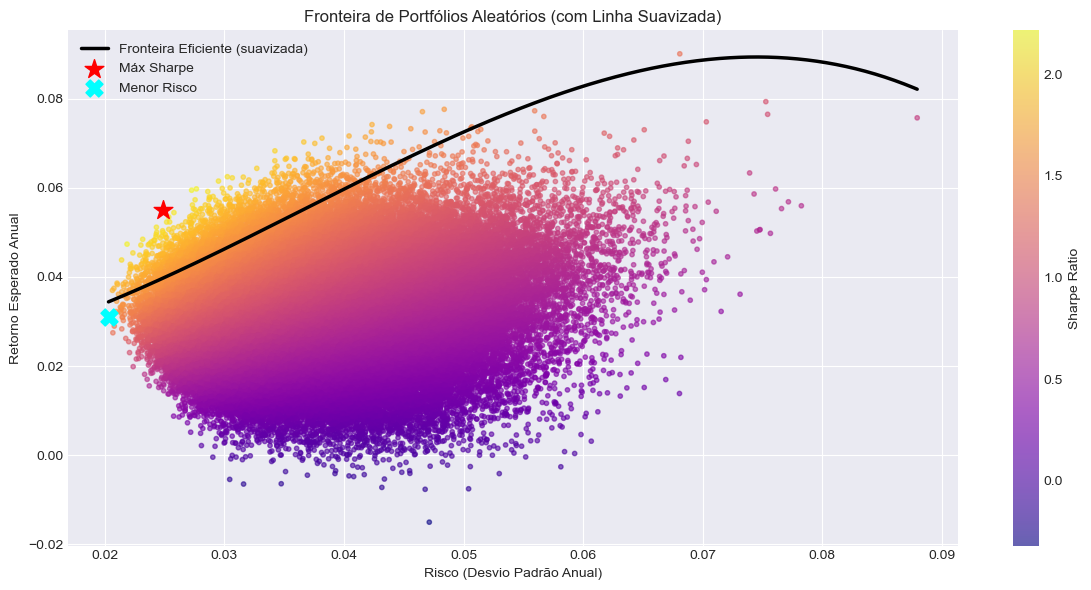

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. Filtrar os top 5% Sharpe Ratios para garantir que estamos perto da fronteira
limiar = df_portfolios['sharpe'].quantile(0.95)
df_top = df_portfolios[df_portfolios['sharpe'] >= limiar].copy()

# 2. Regressão polinomial: risco → retorno
X = df_top['risco'].values.reshape(-1, 1)
y = df_top['retorno'].values

# 3. Ajustar curva polinomial de grau 3 (pode testar outros)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

# 4. Gera valores para plotar a curva suavizada
risco_range = np.linspace(df_portfolios['risco'].min(), df_portfolios['risco'].max(), 500).reshape(-1, 1)
retorno_pred = model.predict(poly.transform(risco_range))

# 5. Plotar tudo
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))

# Pontos de todas as carteiras
scatter = plt.scatter(df_portfolios['risco'], df_portfolios['retorno'], 
                      c=df_portfolios['sharpe'], cmap='plasma', s=10, alpha=0.6)

plt.colorbar(scatter, label='Sharpe Ratio')

# Linha suavizada da fronteira eficiente
plt.plot(risco_range, retorno_pred, color='black', linewidth=2.5, label='Fronteira Eficiente (suavizada)')

# Marcar o portfólio com Sharpe máximo
plt.scatter(max_sharpe['risco'], max_sharpe['retorno'], 
            color='red', marker='*', s=200, label='Máx Sharpe')

# Marcar o portfólio com menor risco
plt.scatter(min_risk['risco'], min_risk['retorno'], 
            color='cyan', marker='X', s=150, label='Menor Risco')

# Título e eixos
plt.xlabel('Risco (Desvio Padrão Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.title('Fronteira de Portfólios Aleatórios (com Linha Suavizada)')
plt.legend()
plt.tight_layout()
plt.show()


In [70]:

        
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    result = minimize(
        neg_sharpe_ratio,
        num_assets * [1. / num_assets],  # chute inicial: pesos iguais
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result

Lista de ativos: ['NTNB-2029P', 'NTNB-2050P', 'DI1F27_preco', 'DI1F30_preco', 'T10_preco', 'CNY', 'DOL', 'EUR', 'S&P500', 'IBOV']
Bounds por ativo: [(0, 2.0), (0, 2.0), (0, 2.0), (0, 2.0), (0, 1.0), (0, 0.3), (0, 0.3), (0, 0.3), (0, 0.2), (0, 0.25)]


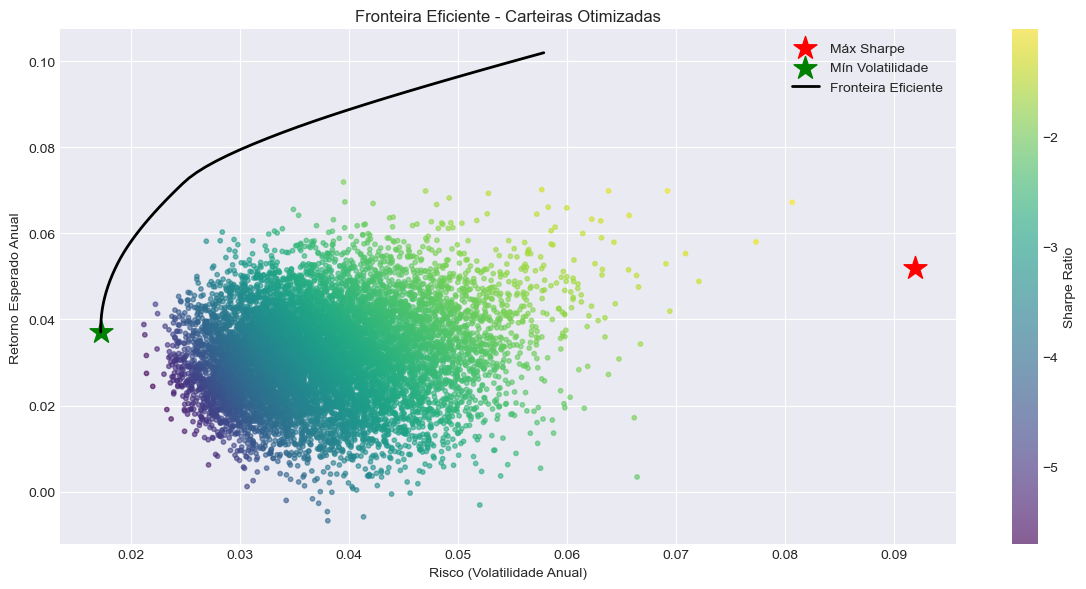

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

grupos = {
    'NTNB-2029P': 'IPCA + Pré',
    'NTNB-2050P': 'IPCA + Pré',
    'DI1F27_preco': 'IPCA + Pré',
    'DI1F30_preco': 'IPCA + Pré',
    'T10_preco': 'Treasury',
    'CNY': 'Yuan',
    'DOL': 'US$',
    'EUR': 'Euro',
    'S&P500': 'S&P',
    'IBOV': 'IBOVESPA'
}

# Limites por grupo (convertido para frações)
limites = { 
    'IPCA + Pré': 2.0,
    'US$': 0.3,
    'Treasury': 1.0,
    'S&P': 0.2,
    'Ações BDR': 0.2,
    'IBOVESPA': 0.25,
    'Euro': 0.3,
    'Yuan': 0.3
}

# Lista de ativos (em ordem do seu dataframe de retornos)
ativos = list(grupos.keys())
print(f"Lista de ativos: {ativos}")

# Criar bounds por ativo com base no grupo
bounds = [(0, limites[grupos[ativo]]) for ativo in ativos]
print(f"Bounds por ativo: {bounds}")

# Criar restrição da soma dos pesos igual a 1
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]


# (Opcional) Adicionar restrições por grupo (soma ≤ limite)
for nome_grupo, limite in limites.items():
    indices = [i for i, ativo in enumerate(ativos) if grupos[ativo] == nome_grupo]
    if indices:
        constraints.append({
            'type': 'ineq',  # np.sum(grupo) ≤ limite → limite - soma ≥ 0
            'fun': lambda x, idx=indices, lim=limite: lim - np.sum(x[idx])
        })

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns) # E[R_p] = wᵀ * μ
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) # Var(R_p) = wᵀ * Σ * w
    return std, returns

# Sharpe Ratio = (E[R_p] - R_f) / σ_p
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_std, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix) # E[R_p] e σ_p
    return -(p_ret - risk_free_rate) / p_std # 


# def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
#     num_assets = len(mean_returns)
#     args = (mean_returns, cov_matrix, risk_free_rate)
#     constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1} # restrição de soma dos pesos = 1
#     bounds = tuple((0, 1) for _ in range(num_assets)) # defini
#     result = minimize(neg_sharpe_ratio, num_assets * [1. / num_assets], args=args,
#                       method='SLSQP', bounds=bounds, constraints=constraints)
#     return result

# Função para maximizar o Sharpe (minimizando o negativo)
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    result = minimize(
        neg_sharpe_ratio,
        num_assets * [1. / num_assets],  # chute inicial: pesos iguais
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = tuple((0, 1) for _ in range(num_assets))
    result = minimize(portfolio_volatility, num_assets * [1. / num_assets], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    result = minimize(portfolio_volatility, num_assets * [1. / num_assets], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def efficient_frontier(mean_returns, cov_matrix, returns_range):
    return [efficient_return(mean_returns, cov_matrix, ret) for ret in returns_range]

# 2. Executar otimizações
risk_free_rate = 0.15 # Taxa livre de risco anualizada (exemplo: 15% ao ano)
mean_returns = mu.values
cov_matrix = S.values
asset_names = mu.index.tolist()

max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)

min_vol = min_variance(mean_returns, cov_matrix)
sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)

# 3. Calcular a fronteira eficiente
target_returns = np.linspace(rp_min, rp + 0.05, 50)
efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target_returns)

# 4. Gerar portfólios aleatórios para visualização
n_portfolios = 10000
results = {'retorno': [], 'risco': [], 'sharpe': []}
for _ in range(n_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    ret = np.dot(weights, mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (ret - risk_free_rate) / std
    results['retorno'].append(ret)
    results['risco'].append(std)
    results['sharpe'].append(sharpe)
df_random = pd.DataFrame(results)

# 5. Plot
plt.figure(figsize=(12, 6))
plt.scatter(df_random['risco'], df_random['retorno'], c=df_random['sharpe'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sdp, rp, marker='*', color='r', s=300, label='Máx Sharpe')
plt.scatter(sdp_min, rp_min, marker='*', color='g', s=300, label='Mín Volatilidade')
plt.plot([p['fun'] for p in efficient_portfolios], target_returns, linestyle='-', color='black', linewidth=2.0, label='Fronteira Eficiente')
plt.xlabel('Risco (Volatilidade Anual)')
plt.ylabel('Retorno Esperado Anual')
plt.title('Fronteira Eficiente - Carteiras Otimizadas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [72]:
# from pypfopt.expected_returns import mean_historical_return
# from pypfopt.risk_models import sample_cov
# from pypfopt.efficient_frontier import EfficientFrontier

# # Otimização
# ef = EfficientFrontier(mu, S)

In [73]:
# # --------- Agrupamentos por fator de risco -----------

# tickers = ef.tickers  # garante ordem correta

# # IPCA + Pré (200%)
# ipca_pre_idx = [
#     tickers.index("NTNB-2029P"),
#     tickers.index("NTNB-2050P"),
#     tickers.index("DI1F27_preco"),
#     tickers.index("DI1F30_preco")
# ]
# ef.add_constraint(lambda w: sum(w[i] for i in ipca_pre_idx) <= 2.0)

# # US$ (30%)
# ef.add_constraint(lambda w: w[tickers.index("DOL")] <= 0.3)

# # Treasury (100%)
# ef.add_constraint(lambda w: w[tickers.index("T10_preco")] <= 1.0)

# # S&P (20%)
# ef.add_constraint(lambda w: w[tickers.index("S&P500")] <= 0.2)

# # IBOV (25%)
# ef.add_constraint(lambda w: w[tickers.index("IBOV")] <= 0.25)

# # Euro (30%)
# ef.add_constraint(lambda w: w[tickers.index("EUR")] <= 0.3)

# # Yuan (30%)
# ef.add_constraint(lambda w: w[tickers.index("CNY")] <= 0.3)

In [74]:
# # Maximizar Sharpe ratio respeitando as restrições
# weights = ef.max_sharpe()
# cleaned_weights = ef.clean_weights()
# ef.portfolio_performance(verbose=True)

# print("Pesos otimizados com restrições:")
# print(cleaned_weights)

In [75]:
# weights_dict = {
#     'NTNB-2029P': 0.0,
#     'NTNB-2050P': 0.0,
#     'DI1F27_preco': 0.5108,
#     'DI1F30_preco': 0.0,
#     'T10_preco': 0.0,
#     'CNY': 0.09844,
#     'DOL': 0.17964,
#     'EUR': 0.11546,
#     'S&P500': 0.09566,
#     'IBOV': 0.0
# }



In [76]:
# import numpy as np
# import matplotlib.pyplot as plt

# # 1. Pesos como array (ordem igual às colunas do log_returns)
# assets = list(weights_dict.keys())
# weights = np.array([weights_dict[asset] for asset in assets])

# # 2. Filtrar apenas os ativos usados no log_returns
# log_returns_filtered = log_returns[assets]

# # 3. Calcular retorno e risco anualizados
# mu = log_returns_filtered.mean() * 252
# cov = log_returns_filtered.cov() * 252

# # 4. Retorno e risco da carteira
# expected_return = np.dot(weights, mu)
# portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

# # 5. Plotar
# plt.figure(figsize=(8,6))
# plt.scatter(portfolio_std, expected_return, color='blue', s=100, label='Carteira')

# # Adiciona ativos individuais (opcional)
# for asset in assets:
#     std_i = np.sqrt(cov.loc[asset, asset])
#     plt.scatter(std_i, mu[asset], label=asset)

# plt.xlabel('Risco (Desvio Padrão Anual)')
# plt.ylabel('Retorno Esperado Anual')
# plt.title('Carteira vs. Ativos Individuais')
# plt.grid(True)
# plt.legend()
# plt.show()
